## AWAL

In [ ]:
# Importing packages
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import scipy.stats as stats

In [ ]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/wandakinasih/gg2/main/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
# Checking missing values
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [ ]:
describe_df = df.groupby("version").describe()[['sum_gamerounds']]

describe_df

sum_gamerounds                                                      
                 count       mean         std  min  25%   50%   75%      max
version                                                                     
gate_30        44700.0  52.456264  256.716423  0.0  5.0  17.0  50.0  49854.0
gate_40        45489.0  51.298776  103.294416  0.0  5.0  16.0  52.0   2640.0

Text(0, 0.5, 'Number of Player')

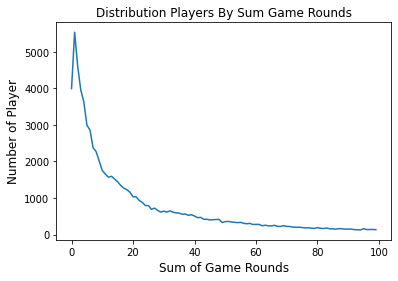

In [ ]:
# Create the data frame grouped by version
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plot the distribution
ax = plot_df.head(100).plot()
plt.title('Distribution Players By Sum Game Rounds')
plt.xlabel('Sum of Game Rounds', size = 12)
plt.ylabel('Number of Player', size = 12)

In [ ]:
# Define A/B groups
df["version"] = np.where(df.version == "gate_30", "A", "B")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


In [ ]:
# A/B Testing Function - Quick Solution
def AB_Test(dataframe, group, target):
    
    # Split A/B
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]
    
    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True
    
    if (ntA == False) & (ntB == False): # "H0: Normal Distribution"
        # Parametric Test
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True
        
        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
        
    # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
    })
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "The gate placement on certain level have impact on the player’s retention rate and game rounds", "The gate placement on certain level have no impact on the player’s retention rate and game rounds")
    
    # Columns
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    
    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    
    return temp
    
    
    
# Apply A/B Testing
AB_Test(dataframe=df, group = "version", target = "sum_gamerounds")

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,0.025104,The gate placement on certain level have no im...


In [ ]:
df.groupby("version").retention_1.mean(), df.groupby("version").retention_7.mean()

(version
 A    0.448188
 B    0.442283
 Name: retention_1, dtype: float64, version
 A    0.190201
 B    0.182000
 Name: retention_7, dtype: float64)

-----------------------------

## Data Collection
*   **userid** — a unique number of each player. </br>
*   **version** — whether the player was put in the control group (gate_30 — a gate at level 30) or the test group (gate_40 — a gate at level 40).</br>
*   **sum_gamerounds** — the number of game rounds played by the player during the first week after installation</br>
*   **retention_1** — did the player return, and play 1 day after installation? True or False</br>
*   **retention_7** — did the player return, and play 7 days after installation? True or False



## Loading Data and Exploratory Data Analysis

In [ ]:
# Importing packages
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [ ]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/wandakinasih/gg2/main/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
# Checking data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
# Check for data duplication
print("Total players:", df['userid'].count())
print("Total unique players':", df['userid'].nunique())

Total players: 90189
Total unique players': 90189


[Text(0, 0.5, 'Total players'),
 Text(0.5, 0, 'version'),
 Text(0.5, 1.0, 'Number of players by version')]

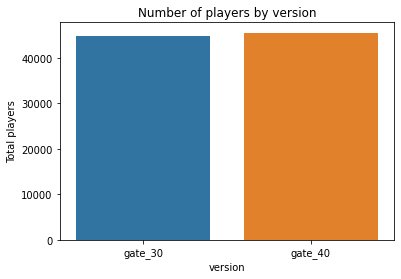

In [ ]:
# Number of players in each version
chart_version=sns.countplot(x='version' ,data=df)
chart_version.set(xlabel="version", ylabel="Total players",title='Number of players by version')

In [ ]:
# Data Summary
df.describe()[["sum_gamerounds"]] # there's outliers

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


Text(0, 0.5, 'Number of game rounds')

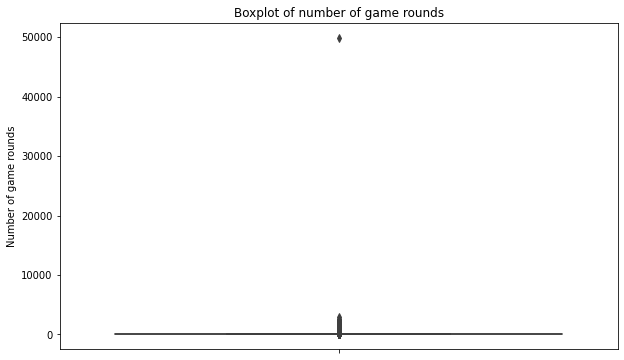

In [ ]:
#Boxplot
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='sum_gamerounds', data=df)
ax.set_title('Boxplot of number of game rounds')
ax.set_ylabel('Number of game rounds')

In [ ]:
# Handling outlier by removing
df2 = df[df.sum_gamerounds < df.sum_gamerounds.max()]
df2.describe()[["sum_gamerounds"]]

,sum_gamerounds
count,90188.000000
mean,51.320253
std,102.682719
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,2961.000000


Text(0, 0.5, 'Number of game rounds')

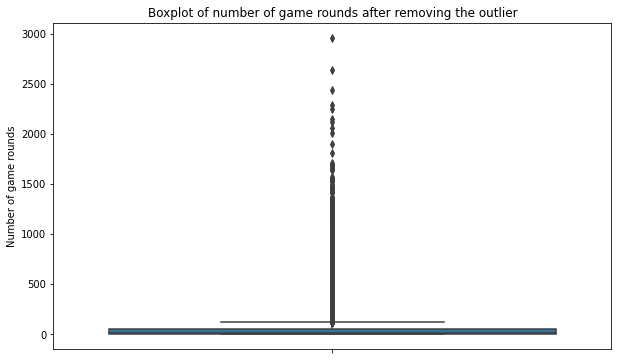

In [ ]:
#Boxplot
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='sum_gamerounds', data=df2)
ax.set_title('Boxplot of number of game rounds after removing the outlier')
ax.set_ylabel('Number of game rounds')

Text(0.5, 1.0, 'Players Distribution by Game Rounds')

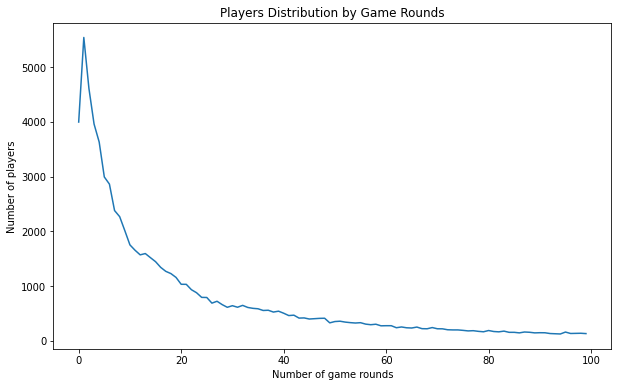

In [ ]:
# Plot distribution of game rounds
df_plot = df.groupby('sum_gamerounds').count().reset_index()
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='sum_gamerounds', y='userid', data=df_plot.head(n=100))
ax.set_xlabel('Number of game rounds')
ax.set_ylabel('Number of players')
ax.set_title('Players Distribution by Game Rounds')

In [ ]:
# Sum Grounds Summary
df2.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17.0,51.342111,102.057598,2961
gate_40,45489,16.0,51.298776,103.294416,2640


In [ ]:
# Retention 1 Summary
df2.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median       mean         std   max
version retention_1                                            
gate_30 False        24665     6.0  16.359092   36.528426  1072
        True         20034    48.0  94.411700  135.037697  2961
gate_40 False        25370     6.0  16.340402   35.925756  1241
        True         20119    49.0  95.381182  137.887256  2640

In [ ]:
# Retention 7 Summary
df2.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median        mean         std   max
version retention_7                                             
gate_30 False        36198    11.0   25.796508   43.316158   981
        True          8501   105.0  160.117516  179.358560  2961
gate_40 False        37210    11.0   25.856356   44.406112  2640
        True          8279   111.0  165.649837  183.792499  2294

## A/B Testing using Chi Square

In [ ]:
# Set up contingency table
df_con = pd.DataFrame(data={'version': ['gate_30', 'gate_40']})
df_con['retained_1'] = df[df.retention_1==True].groupby(by='version').count()['retention_1'].values
df_con['nonretained_1'] = df[df.retention_1==False].groupby(by='version').count()['retention_1'].values
df_con['retained_7'] = df[df.retention_7==True].groupby(by='version').count()['retention_7'].values
df_con['nonretained_7'] = df[df.retention_7==False].groupby(by='version').count()['retention_7'].values

In [ ]:
# Chi-squared test for 1-day retention
chi2, pvalue, _, _ = stats.chi2_contingency(df_con[['retained_1', 'nonretained_1']])
print('Test statistic: {}\np-value: {}'.format(chi2, pvalue))

Test statistic: 3.1591007878782262
p-value: 0.07550476210309086


In [ ]:
# Chi-squared test for 7-day retention
chi2, pvalue, _, _ = stats.chi2_contingency(df_con[['retained_7', 'nonretained_7']])
print('Test statistic: {}\np-value: {}'.format(chi2, pvalue))

Test statistic: 9.959086799559165
p-value: 0.0016005742679058301


In [ ]:
# Mann Whitney test for game rounds
#Group the sum_gamerounds based on the version
df_sum_gate30 = df2[df2['version'] == 'gate_30']['sum_gamerounds']
df_sum_gate40 = df2[df2['version'] == 'gate_40']['sum_gamerounds']

#Man-Whitney testing
mannwhitneyu(df_sum_gate30, df_sum_gate40, alternative='less')

MannwhitneyuResult(statistic=1024285761.5, pvalue=0.97455423878383)

In [ ]:
# More player
df.groupby("version").retention_1.mean(), df.groupby("version").retention_7.mean()

(version
 gate_30    0.448188
 gate_40    0.442283
 Name: retention_1, dtype: float64, version
 gate_30    0.190201
 gate_40    0.182000
 Name: retention_7, dtype: float64)